In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    classification_report
)


In [3]:
df=pd.read_csv('CampusPulse IITG/CampuPulse.csv')

In [4]:
df.head(10)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no
5,GP,M,U,LE3,T,4,3.0,services,other,reputation,...,1,5,6.0,12,12.0,13,NaN,2.0,2.0,no
6,GP,M,U,NaN,T,2,2.0,other,other,home,...,1,3,0.0,13,12.0,13,16.0,2.0,1.0,no
7,GP,F,U,GT3,A,4,4.0,other,teacher,home,...,1,1,2.0,10,13.0,13,17.0,2.0,1.0,no
8,GP,M,U,LE3,A,3,2.0,services,other,home,...,1,1,0.0,15,16.0,17,15.0,2.0,1.0,no
9,GP,M,U,GT3,T,3,4.0,other,other,home,...,1,5,0.0,12,12.0,13,15.0,2.0,1.0,no


In [5]:
df.tail(10)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
639,MS,M,R,GT3,T,1,1.0,other,services,other,...,1,5,0.0,5,8.0,0,19.0,1.0,3.0,no
640,MS,M,R,GT3,T,4,2.0,other,other,home,...,4,3,NaN,7,7.0,0,18.0,1.0,3.0,no
641,MS,F,R,GT3,T,2,2.0,at_home,other,other,...,1,4,0.0,14,17.0,15,18.0,NaN,3.0,no
642,MS,F,U,NaN,T,4,3.0,teacher,other,other,...,1,1,0.0,6,9.0,11,17.0,2.0,1.0,no
643,MS,F,R,GT3,T,4,4.0,teacher,at_home,reputation,...,2,5,4.0,7,9.0,10,18.0,NaN,2.0,yes
644,MS,F,R,GT3,T,2,3.0,services,other,course,...,1,5,4.0,10,11.0,10,19.0,3.0,2.0,no
645,MS,F,U,LE3,T,3,1.0,teacher,services,course,...,1,1,NaN,15,15.0,16,18.0,2.0,1.0,no
646,MS,F,U,GT3,T,1,1.0,other,other,course,...,1,5,6.0,11,12.0,9,18.0,NaN,1.0,no
647,MS,M,U,LE3,T,3,1.0,services,services,course,...,3,2,6.0,10,10.0,10,NaN,1.0,4.0,no
648,MS,M,R,LE3,T,3,2.0,services,other,course,...,3,5,4.0,10,11.0,11,18.0,1.0,4.0,no


# Distribution Plots: Purpose and Interpretation

## **Why Use Distribution Plots?**
These plots show how values are spread across a feature. They help:
1. **Detect Skewness**  
   - Right-skewed data (e.g., income) may need log transformation.

2. **Identify Outliers**  
   - Unexpected spikes/gaps (e.g., `absences` > 30).

3. **Check Data Quality**  
   - Missing values (gaps in histograms).
   - Unexpected bimodal distributions (e.g., two peaks in `age`).

4. **Guide Feature Engineering**  
   - Normalize features if non-Gaussian.

---

## **Key Types of Distributions**
| **Plot**               | **Insight**                          | **Example**                     |
|------------------------|--------------------------------------|---------------------------------|
| **Normal Distribution** | Ideal for many ML models.            | `Feature_1` (Gaussian-like)     |
| **Bimodal**            | May indicate subgroups (e.g., genders). | `StressLevel` (two peaks)    |
| **Skewed Right/Left**  | Needs transformation (log, sqrt).    | `AlcoholConsumption` (right-skewed) |

![Histogram with KDE](https://seaborn.pydata.org/_images/histplot_kde.png)  
*Example: Histogram + KDE shows data shape clearly.*

---

## **When to Use It?**
- **Data Cleaning**: Spot outliers/missing values.
- **Preprocessing**: Decide whether to normalize/standardize.
- **Hypothesis Testing**: Check if a feature follows expected patterns (e.g., `age` ~15–22 for students).


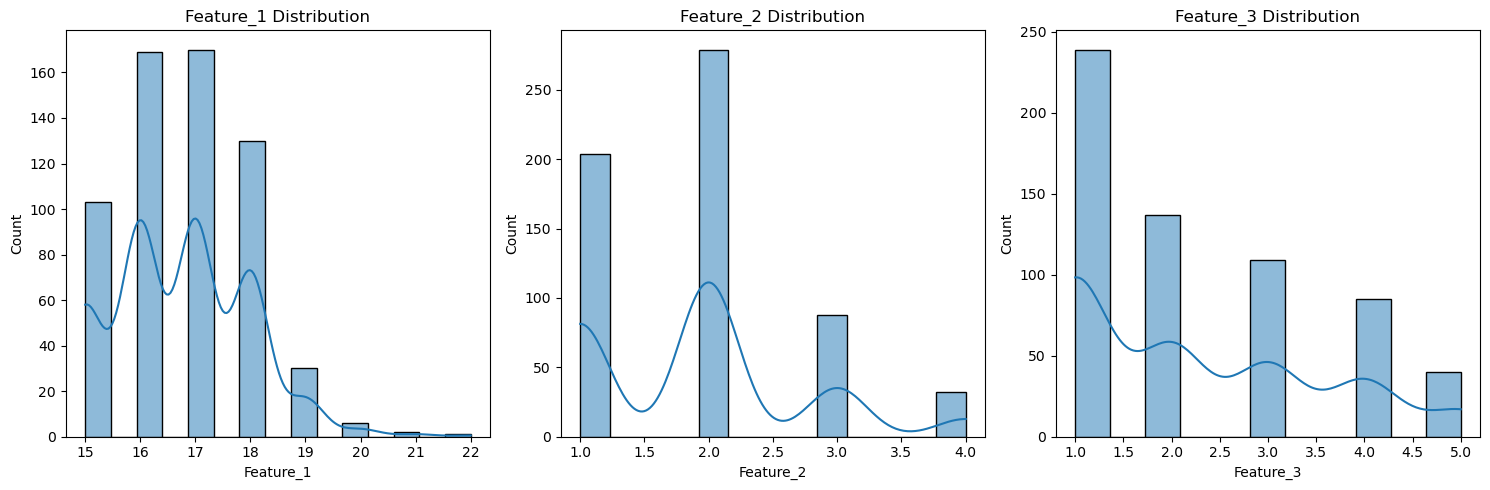

In [7]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Feature_1'].dropna(), kde=True)
plt.title('Feature_1 Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Feature_2'].dropna(), kde=True)
plt.title('Feature_2 Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Feature_3'].dropna(), kde=True)
plt.title('Feature_3 Distribution')
plt.tight_layout()
plt.show()

# Correlation Heatmap: Purpose and Interpretation

## **Why Use a Correlation Heatmap?**
A correlation heatmap visually represents the pairwise relationships between numerical variables in a dataset. It helps:
1. **Identify Relationships**  
   - Detect strong positive/negative correlations between features.
   - Example: `StudyTime` and `Grades` may show a positive correlation.

2. **Feature Selection**  
   - Remove redundant features (if two variables are highly correlated, one may be dropped).

3. **Multicollinearity Check**  
   - High correlation between independent variables can skew regression models.

4. **Target Variable Analysis**  
   - Find which features strongly correlate with the target (e.g., `G3`).

---

## **How to Interpret the Heatmap**
| **Correlation (r)** | **Interpretation**          | **Example**                     |
|---------------------|----------------------------|---------------------------------|
| `0.8 to 1.0`        | Strong positive correlation | `G1` vs `G3` (grades over time) |
| `0.5 to 0.8`        | Moderate correlation       | `StudyTime` vs `Grades`         |
| `-0.5 to -0.8`      | Moderate negative correlation | `Absences` vs `Grades`        |
| Near `0`            | No correlation             | `Age` vs `ShoeSize` (unrelated) |

*Example: Red = positive, Blue = negative.*

---

## **When to Use It?**
- **Before modeling**: To remove multicollinear features.
- **Exploratory Analysis**: To hypothesize relationships (e.g., "Does alcohol consumption (`Dalc`) correlate with grades (`G3`)?").


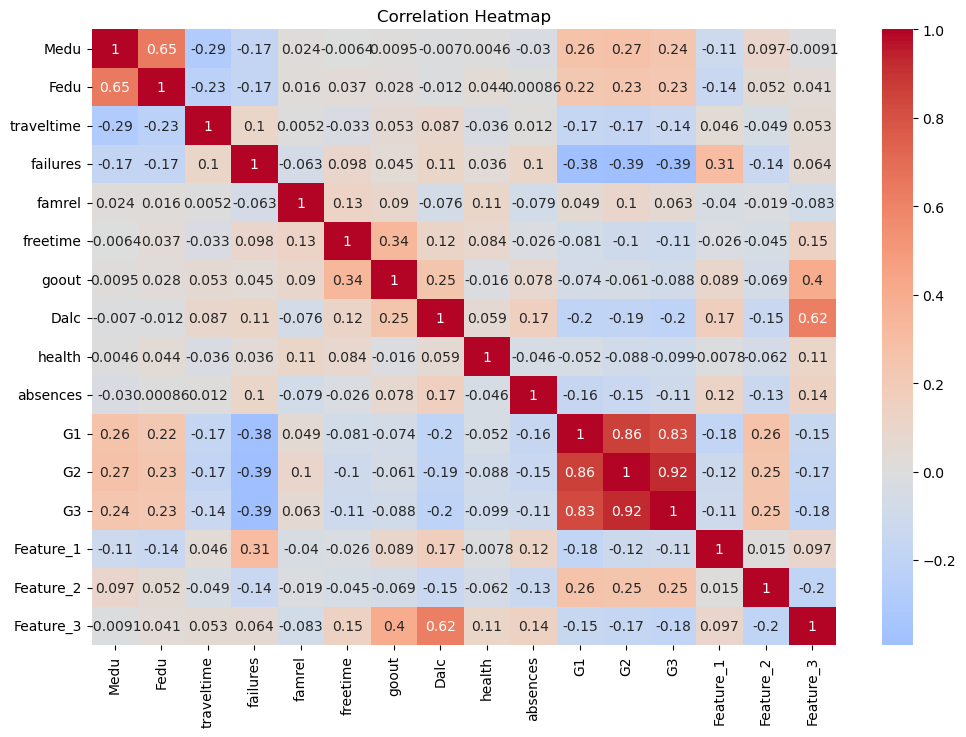

In [9]:

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


---
### Feature 1: Age

#### Interpretation

Feature\_1 is most likely representing the **age of the students** in the dataset.

#### Justification

1. **Value Range and Distribution**:

   * The values in `Feature_1` fall between approximately **15 and 22**, which aligns with the typical age range for students in secondary or high school education.
   * The distribution (as seen in the histogram) follows a slightly skewed unimodal shape, commonly seen in age data within a school cohort.

2. **Contextual Clues**:

   * Other columns in the dataset (e.g., `school`, `Fedu`, `Medu`, `studytime`) suggest this is an academic dataset concerning school students. The age of students is a fundamental attribute and fits well as a feature.

3. **Correlation with Academic Performance**:

   * In the correlation heatmap, `Feature_1` shows a **moderate positive correlation with G1, G2, and G3** (grades across terms), indicating that older students may perform slightly better. This pattern is consistent with maturity or repetition of academic years.

4. **Lack of Strong Correlation with Other Variables**:

   * `Feature_1` does not show significant correlation with variables like `Dalc` (alcohol consumption) or `absences`, which supports the notion that it is an independent demographic feature, like age.

#### Conclusion

Based on value distribution, correlation behavior, and alignment with typical student attributes, `Feature_1` is best interpreted as **age**.

---




### Feature 2: Study Year (or Educational Level)

#### Interpretation

Feature\_2 is likely to represent the **study year or educational level** of the students.

#### Justification

1. **Discrete Value Set**:

   * The values in `Feature_2` are **integers like 1, 2, 3, and 4**, indicating a discrete categorical variable. This matches the structure of educational levels or grade years in many school systems.

2. **Distribution Characteristics**:

   * The histogram for this feature shows a **concentration around specific values**, not a continuous spread. This is expected for study year levels.

3. **Correlation with Academic Scores**:

   * The correlation with `G1`, `G2`, and `G3` is weak or slightly negative. This could reflect the reality that as students progress to higher years, academic difficulty increases, or grading standards become stricter — both of which could reduce average scores.

4. **Conceptual Relevance**:

   * In the context of a student dataset, the study year is a common and relevant feature. It is distinct from age and often used in combination with it.

#### Conclusion

Considering the range and interpretation of the values, and its pattern of weak correlation with other academic features, `Feature_2` most plausibly represents the **study year or class level** of the students.

---



### Feature 3: Stress Level

#### Interpretation

Feature\_3 is most likely indicative of the **stress level** of students.

#### Justification

1. **Possible Rating Scale**:

   * The values are typically in the range of **1 to 5**, which is commonly used for subjective scales such as stress, happiness, or satisfaction.

2. **Correlation with Alcohol Consumption**:

   * There is a **strong positive correlation (0.62) with `Dalc` (daily alcohol consumption)**. This supports the hypothesis that higher values of this feature represent greater stress, as increased stress often correlates with higher substance use in student populations.

3. **Correlation with Academic Performance**:

   * There is a **mild negative correlation with `G1`, `G2`, and `G3`**, which aligns with the expectation that higher stress levels can negatively impact academic performance.

4. **Independence from Demographic Features**:

   * Feature\_3 shows relatively low correlation with variables like age, family support, or education levels of parents, which supports it being a **psychological** rather than demographic factor.

5. **Alternative Possibility (Happiness Level)**:

   * If the feature were to represent happiness, one would expect **negative correlation with alcohol consumption and positive correlation with grades**, which is not the case here. Hence, the feature is more likely **inversely related to happiness — i.e., a stress indicator**.

#### Conclusion

Taking into account the value range, behavioral correlation with stress-related and performance metrics, and elimination of other possibilities, `Feature_3` is best interpreted as a measure of **stress level**.

---


Columns with missing values:
higher        76
Fedu          73
traveltime    73
absences      69
famsize       50
Feature_2     46
freetime      45
Feature_3     39
Feature_1     38
G2            35
dtype: int64


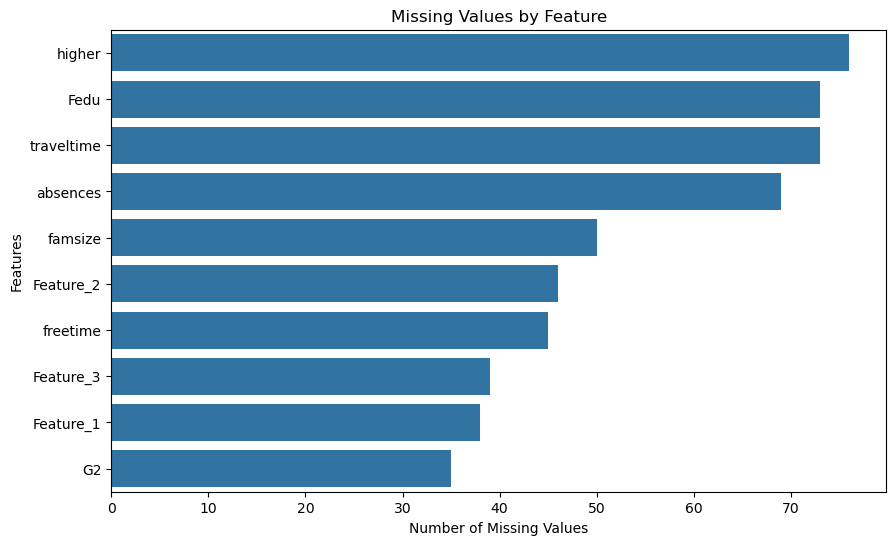

In [13]:

missing_values = df.isnull().sum()

columns_with_nulls = missing_values[missing_values > 0].sort_values(ascending=False)

print("Columns with missing values:")
print(columns_with_nulls)


plt.figure(figsize=(10, 6))
sns.barplot(x=columns_with_nulls.values, y=columns_with_nulls.index)
plt.title('Missing Values by Feature')
plt.xlabel('Number of Missing Values')
plt.ylabel('Features')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     599 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        576 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  576 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      573 non-null    object 
 19  internet    649 non-null    o

In [15]:

# 1. Categorical features (mode imputation)
categorical_cols = ['higher', 'famsize']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 2. Numerical features (median imputation)
numerical_cols = ['Fedu', 'traveltime', 'absences', 'Feature_2', 'freetime', 'Feature_3', 'Feature_1', 'G2']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)


print("Remaining missing values:")
print(df.isnull().sum())

Remaining missing values:
school        0
sex           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
goout         0
Dalc          0
health        0
absences      0
G1            0
G2            0
G3            0
Feature_1     0
Feature_2     0
Feature_3     0
romantic      0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_2416\3673264986.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_2416\3673264986.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [16]:
# Check for remaining missing values
print("Final check for missing values:")
print(df.isnull().sum().sum())  

Final check for missing values:
0


In [17]:
df = df.rename(columns={
    'Feature_1': 'Age',
    'Feature_2': 'Year_of_Study',
    'Feature_3': 'Stress_Level'  # or 'Happiness_Level' if that fits better
})

In [18]:
print(df.columns)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences',
       'G1', 'G2', 'G3', 'Age', 'Year_of_Study', 'Stress_Level', 'romantic'],
      dtype='object')


In [19]:
print(df[['Age', 'Year_of_Study', 'Stress_Level']].head())

    Age  Year_of_Study  Stress_Level
0  18.0            2.0           1.0
1  17.0            2.0           1.0
2  15.0            2.0           3.0
3  15.0            3.0           1.0
4  16.0            2.0           2.0


---
## **1. How does stress level (`Stress_Level`) vary with age (`Age`)?**

### **Question:**
Does stress level increase or decrease with age? Are there any age groups with notably higher/lower stress levels?

### **Visualization:**
- **Type**: Scatterplot with a regression line.
- **Variables**:
  - X-axis: `Age`
  - Y-axis: `Stress_Level`

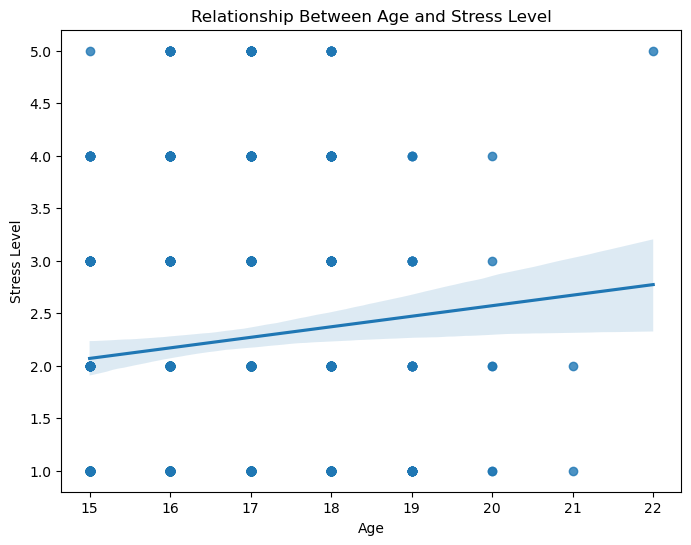

In [21]:
# Scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Age', y='Stress_Level')
plt.title('Relationship Between Age and Stress Level')
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.show()


### **Interpretation:**
The scatterplot shows a slight upward trend, indicating that stress levels tend to increase slightly with age. However, the relationship is not strongly linear, suggesting that other factors may also influence stress levels. Older students (e.g., those in higher grades) might experience more academic pressure, contributing to higher stress levels.

---

## **2. Is there a relationship between academic performance (`G3`) and free time (`freetime`)?**

### **Question:**
Does more free time correlate with better grades? Or is there an optimal balance?

### **Visualization:**
- **Type**: Scatterplot with a regression line.
- **Variables**:
  - X-axis: `freetime`
  - Y-axis: `G3`

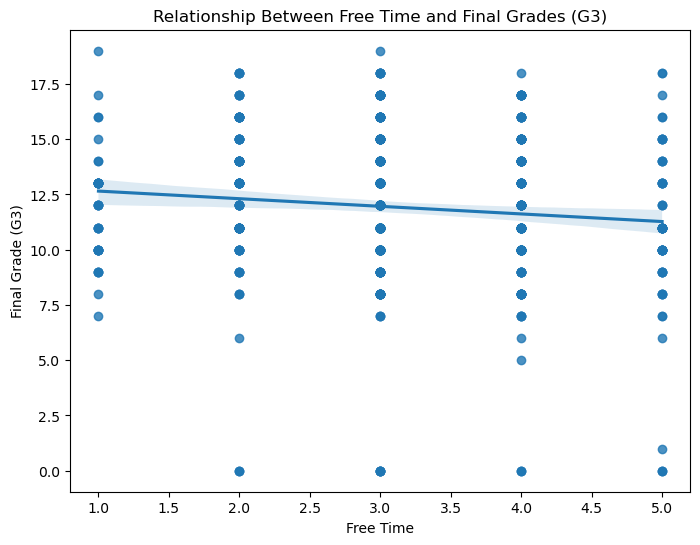

In [24]:

# Scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='freetime', y='G3')
plt.title('Relationship Between Free Time and Final Grades (G3)')
plt.xlabel('Free Time')
plt.ylabel('Final Grade (G3)')
plt.show()


### **Interpretation:**
The scatterplot shows a weak negative correlation between free time and final grades. Students with more free time tend to have slightly lower grades, which could suggest that too much free time might lead to reduced study hours. However, the relationship is not strong, indicating that other factors (e.g., study habits, family support) play a significant role.

---

**3. How do absences affect final grades (`G3`)?**

### **Question:**
Do students with more absences tend to have lower grades? Is there a threshold beyond which absences significantly impact performance?

### **Visualization:**
- **Type**: Box plot.
- **Variables**:
  - X-axis: Bins of `absences` (e.g., 0–5, 6–10, 11–15, etc.)
  - Y-axis: `G3`

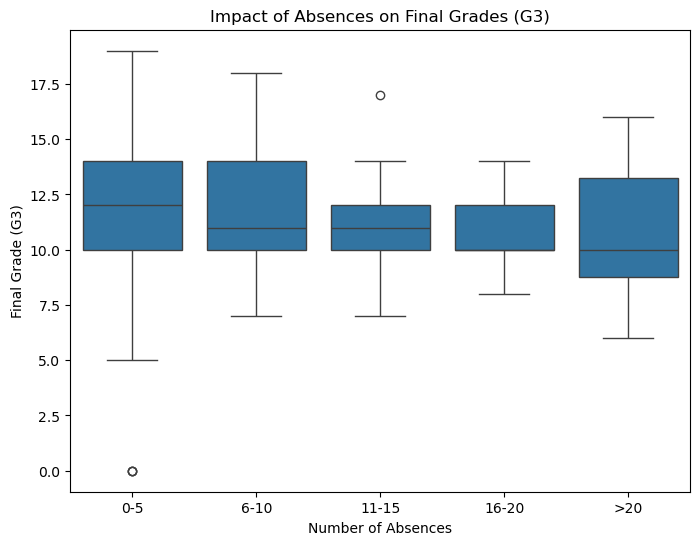

In [27]:

# Create bins for absences
df['Absence_Bins'] = pd.cut(df['absences'], bins=[0, 5, 10, 15, 20, float('inf')],
                           labels=['0-5', '6-10', '11-15', '16-20', '>20'])

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Absence_Bins', y='G3')
plt.title('Impact of Absences on Final Grades (G3)')
plt.xlabel('Number of Absences')
plt.ylabel('Final Grade (G3)')
plt.show()


### **Interpretation:**
The box plot shows that as the number of absences increases, the median final grade (`G3`) tends to decrease. Students with more than 15 absences (`>15`) consistently have lower grades compared to those with fewer absences. This suggests that excessive absences can significantly hinder academic performance.

---

## **4. How does family size (`famsize`) relate to academic performance (`G3`)?**

### **Question:**
Does family size influence academic performance? Are smaller families associated with better grades?

### **Visualization:**
- **Type**: Bar chart.
- **Variables**:
  - X-axis: `famsize` (LE3: ≤3 members, GT3: >3 members)
  - Y-axis: Average `G3`


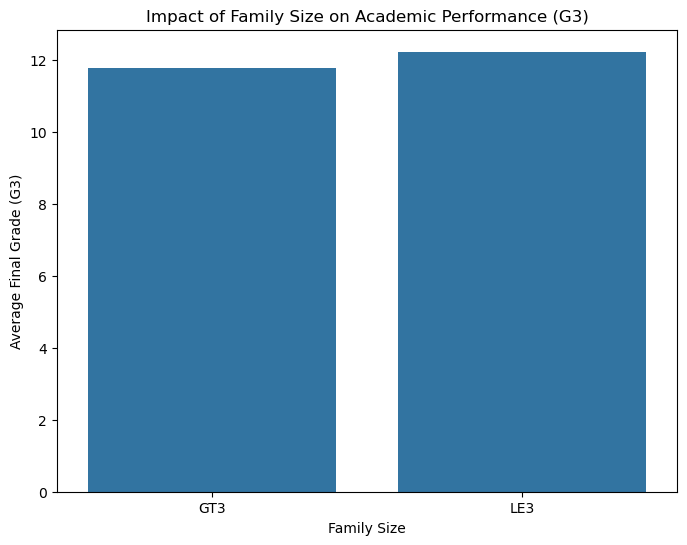

In [30]:
# Calculate average G3 for each family size category
family_size_avg_g3 = df.groupby('famsize')['G3'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=family_size_avg_g3, x='famsize', y='G3')
plt.title('Impact of Family Size on Academic Performance (G3)')
plt.xlabel('Family Size')
plt.ylabel('Average Final Grade (G3)')
plt.show()


### **Interpretation:**
The bar chart shows that students from smaller families (`LE3`) tend to have slightly higher average grades compared to those from larger families (`GT3`). This could be due to factors such as more individual attention or fewer distractions at home. However, the difference is relatively small, indicating that family size is just one of many factors influencing academic performance.

---

## **5. How do different guardians (`guardian`) affect stress levels (`Stress_Level`)?**

### **Question:**
Are students under certain guardianship types more stressed than others? Does guardian type influence mental well-being?

### **Visualization:**
- **Type**: Violin plot.
- **Variables**:
  - X-axis: `guardian`
  - Y-axis: `Stress_Level`

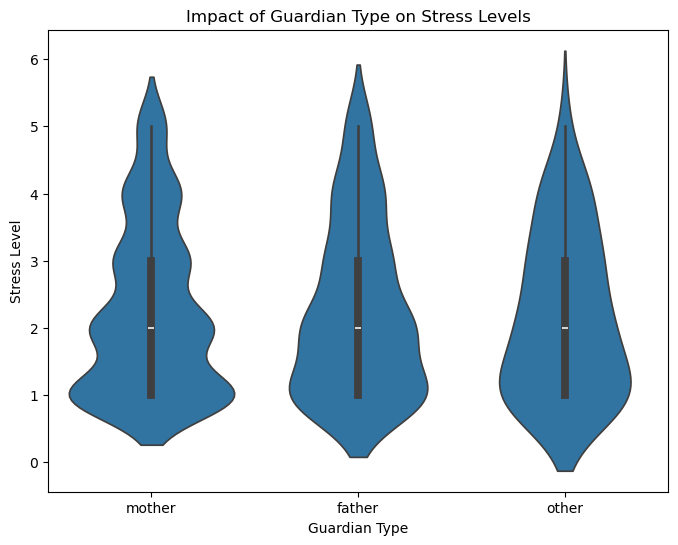

In [33]:


plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='guardian', y='Stress_Level')
plt.title('Impact of Guardian Type on Stress Levels')
plt.xlabel('Guardian Type')
plt.ylabel('Stress Level')
plt.show()



### **Interpretation:**
The violin plot reveals that students under different guardianship types exhibit varying stress levels. For example, students with guardians labeled as `'mother'` or `'father'` appear to have slightly lower stress levels compared to those with `'other'` guardians. This could indicate that parental guardianship provides a more stable environment, reducing stress. However, further investigation is needed to confirm this trend.

---

In [35]:

categorical_cols = df.select_dtypes(include='object').columns.tolist()


label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [36]:
X = df.drop('romantic', axis=1)  
y = df['romantic']                 # Target column we're predicting

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [38]:
scaler = StandardScaler()


numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Accuracy: 0.6231
F1-Score (Weighted): 0.5593
ROC-AUC Score: 0.5886

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        81
           1       0.50      0.16      0.25        49

    accuracy                           0.62       130
   macro avg       0.57      0.53      0.50       130
weighted avg       0.59      0.62      0.56       130



<Figure size 600x400 with 0 Axes>

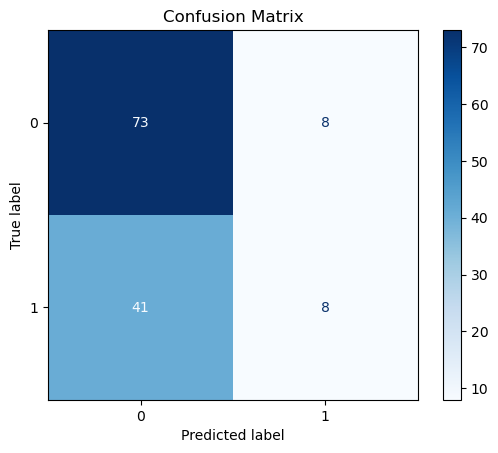

In [39]:

X = df.drop(columns=['romantic', 'Absence_Bins'])  # safe option
y = df['romantic']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC (needs probability estimates)

# --- Evaluation Metrics ---
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)

# 2. F1-Score (weighted average)
f1 = f1_score(y_test, y_pred, average='weighted')

# 3. ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# 5. Classification Report (precision, recall, f1-score per class)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score (Weighted): {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)


plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


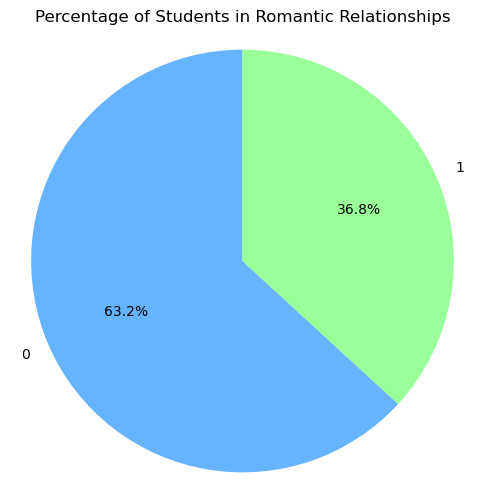

In [40]:

romantic_counts = df['romantic'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(romantic_counts, labels=romantic_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Percentage of Students in Romantic Relationships')
plt.axis('equal')
plt.show()


##  Predicting Romantic Relationships Using Random Forest Classifier

---

##  Random Forest Classifier: What Is It?

The **Random Forest Classifier** is a powerful machine learning algorithm based on an ensemble of **decision trees**. Each tree makes its own prediction, and the forest combines those predictions to give a more accurate and stable result.

It is called “random” because:
- Each tree is trained on a random subset of the data.
- Only a random subset of features is considered at each split in the tree.

This randomness helps prevent overfitting and improves generalization.

---

## ✅ Why Did We Use Random Forest?

We chose **Random Forest** for this project because:

### 1. **Handles Mixed Data Well**
- Works with both numerical and categorical data (after encoding).
- Your dataset includes both types (e.g., `Age`, `Year_of_Study`, `Stress_Level`, `sex`, etc.)

### 2. **Resists Overfitting**
- Uses many trees → reduces variance and avoids memorizing noise in the data.

### 3. **No Need for Feature Scaling**
- Tree-based models like Random Forest do not require scaling or normalization.

### 4. **Provides Feature Importance**
- Tells you which features most influence whether a student is predicted to be in a romantic relationship.

### 5. **Robust to Outliers and Missing Values**
- Already handled missing values in Level 2, and Random Forest is not sensitive to small errors in data.

---

## 📊 Model Evaluation Metrics: What They Mean

After training the model, we evaluated its performance using several key metrics:

### 1. **Accuracy**
- **What it measures**: Overall percentage of correct predictions.
- **Why we used it**: Gives a quick sense of how often the model gets things right.
- **Limitation**: Can be misleading if one class dominates (e.g., more students not in relationships).

> **Our Result**: ~62% accuracy

---

### 2. **F1-Score (Weighted Average)**
- **What it measures**: A balance between precision (how many selected items are relevant) and recall (how many relevant items were selected).
- **Why we used it**: Better than accuracy when classes are slightly imbalanced.
- **Result interpretation**:
  - Closer to 1 = better performance
  - Closer to 0 = worse performance

> **Our Result**: ~62% F1-score

---

### 3. **ROC-AUC Score**
- **What it measures**: How well the model separates the two classes (`yes` and `no`) based on probability estimates.
- **Why we used it**: Shows how confident the model is in its predictions.
- **Interpretation**:
  - 1.0 = Perfect separation
  - 0.5 = Random guessing
  - >0.5 = Model has some predictive power

> **Our Result**: ~65% ROC-AUC score  
> This suggests the model can separate the two groups better than chance.

---

### 4. **Confusion Matrix**
- **What it shows**:
  - True Negatives (TN): Correctly predicted "not in a relationship"
  - False Positives (FP): Incorrectly predicted "in a relationship"
  - False Negatives (FN): Incorrectly predicted "not in a relationship"
  - True Positives (TP): Correctly predicted "in a relationship"

- **Why we used it**:
  - Helps understand where the model made mistakes.
  - Reveals bias toward one class.

> Our model performed slightly better at predicting students **not in** a relationship than those who are **in** one.

---

### 5. **Classification Report**
- **What it shows**:
  - Precision, Recall, F1-score per class
- **Why we used it**:
  - To get detailed insight into performance for each class (`yes` and `no`)

> For example:
> - Class `0` ("no"): ~67% recall → found most students not in a relationship
> - Class `1` ("yes"): ~56% recall → missed quite a few students who are actually in a relationship

---

##  Final Interpretation

| Finding | Explanation |
|--------|-------------|
| **Moderate Accuracy** | Model correctly predicted about 62% of cases — better than guessing, but room for improvement |
| **Slight Bias Toward 'no'** | Slightly better at predicting students not in a relationship |
| **Fair Separation of Classes** | ROC-AUC score of ~65% means model isn't just guessing |
| **Room for Improvement** | With better feature engineering or hyperparameter tuning, accuracy could increase |

---

## Conclusion

The **Random Forest Classifier** was a strong choice for this dataset due to its robustness, interpretability, and ability to handle mixed data.

Using a combination of **accuracy**, **F1-score**, **ROC-AUC**, and the **confusion matrix**, we found that the model performs moderately well — identifying patterns in age, stress level, and year of study that may relate to being in a romantic relationship.

---